# Part 2 EDA

In [103]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import plotly.express as px


## View & Learn Data

In [104]:
# Import Metadata
metadata = pd.read_csv('Cleaned Data CSVs/weather_stations_list.csv')

metadata.head()

,station_id,name,latitude,longitude,elevation,country,provider
0,2979,Cap_ferrat,43.68333,7.32367,138,France,FR_METEOFRANCE
1,2978,Les_orres_fontaines,44.47567,6.55767,1895,France,FR_METEOFRANCE
2,2977,Broc,46.60966,7.10816,682,Switzerland,CH_METEOSWISS
3,2976,Mesocco,46.39560,9.23108,825,Switzerland,CH_METEOSWISS
4,2975,Dischingen_Eglingen,48.71340,10.44050,550,Germany,DE_DWD


In [105]:
# Import Station Data 
station_data = pd.read_csv('Cleaned Data CSVs/monthly_snowpack.csv')

station_data.head()

,id,station_id,year,month,hnsum
0,371401,2249,1996,3,39.0
1,371402,2249,1997,1,99.0
2,371403,2249,1997,2,22.0
3,371404,2249,1997,3,7.0
4,371405,2249,1998,1,84.0


In [106]:
# station_data.describe()
print('Station Data Info')
print(station_data.info())
print('')

print(f'Station Data Shape {station_data.shape}')

print(f'Number Of Unique Entries = {station_data['id'].nunique()} ')

Station Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500100 entries, 0 to 1500099
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1500100 non-null  int64  
 1   station_id  1500100 non-null  int64  
 2   year        1500100 non-null  int64  
 3   month       1500100 non-null  int64  
 4   hnsum       1027301 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 57.2 MB
None

Station Data Shape (1500100, 5)
Number Of Unique Entries = 1500100 


In [107]:
# Drop Null Values
station_data = station_data.dropna()

station_data.describe(include='all')


,id,station_id,year,month,hnsum
count,1.027301e+06,1.027301e+06,1.027301e+06,1.027301e+06,1.027301e+06
mean,1.068072e+06,1.489530e+03,1.990848e+03,6.405561e+00,1.941337e+01
std,4.381786e+05,8.584716e+02,1.802231e+01,3.521692e+00,3.985992e+01
min,3.714010e+05,1.000000e+00,1.864000e+03,1.000000e+00,0.000000e+00
25%,6.808710e+05,7.560000e+02,1.980000e+03,3.000000e+00,0.000000e+00
50%,1.045491e+06,1.494000e+03,1.993000e+03,6.000000e+00,0.000000e+00
75%,1.404724e+06,2.235000e+03,2.004000e+03,1.000000e+01,2.100000e+01
max,1.871500e+06,2.979000e+03,2.020000e+03,1.200000e+01,8.270000e+02


In [108]:
station_data.head()

,id,station_id,year,month,hnsum
0,371401,2249,1996,3,39.0
1,371402,2249,1997,1,99.0
2,371403,2249,1997,2,22.0
3,371404,2249,1997,3,7.0
4,371405,2249,1998,1,84.0


## Clean & Organise Data

### Segergate by 'Winter' months

In [109]:
# Assess 'Winter Months' between November - April

station_data['winter'] = station_data['month'].isin([11, 12, 1, 2, 3, 4])

# Validate new column values

print('Number Of Winter Month Records = ',sum(station_data[station_data['winter']==True].value_counts()))

print('Number Of Summer Month Records =',sum(station_data[station_data['winter']==False].value_counts()))

print('Total Number Of Records = ',station_data.value_counts().sum())

Number Of Winter Month Records =  541578
Number Of Summer Month Records = 485723
Total Number Of Records =  1027301


### Identify Weather Stations In European Alps



In [110]:

gdf_alps = gpd.read_file("/Users/mitchellpalmer/Projects/Europe_Snowpack_Depths/Raw Data CSVs/boundary_alps/AlpineConvention.shp")

gdf_alps

,OBJECTID,AREA,PERIMETER,NUEU1MV8_,NUEU1MV8_I,NUFTTP,NURGCDL3,NURGCDL2,NURGCDL1,NUCNCD,...,ROWID_1,ADCNCD,ADCNNM,ADCNPSEU,ADCNPSEF,ADCNPSCC,ADCNPSOC,SHAPE_Leng,SHAPE_Area,geometry
0,6830,0.398094,4.501714,8614,8676,M,AT213,AT21,AT2,AT,...,13,AT,AUSTRIA,T,F,F,F,4.501719,0.398094,"MULTIPOLYGON (((3893174.789 2365660.083, 38932..."


In [111]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(metadata["longitude"], metadata["latitude"])]
gdf_proj = gpd.GeoDataFrame(metadata, geometry=geometry, crs="EPSG:4326")  # WGS84 lat/lon


In [112]:
# Reproject station points to match the Alpine boundary CRS
gdf_proj = gdf_proj.to_crs(gdf_alps.crs)

# Filter station points inside Alpine region
stations_in_alps = gdf_proj[gdf_proj.within(gdf_alps.geometry.union_all())]

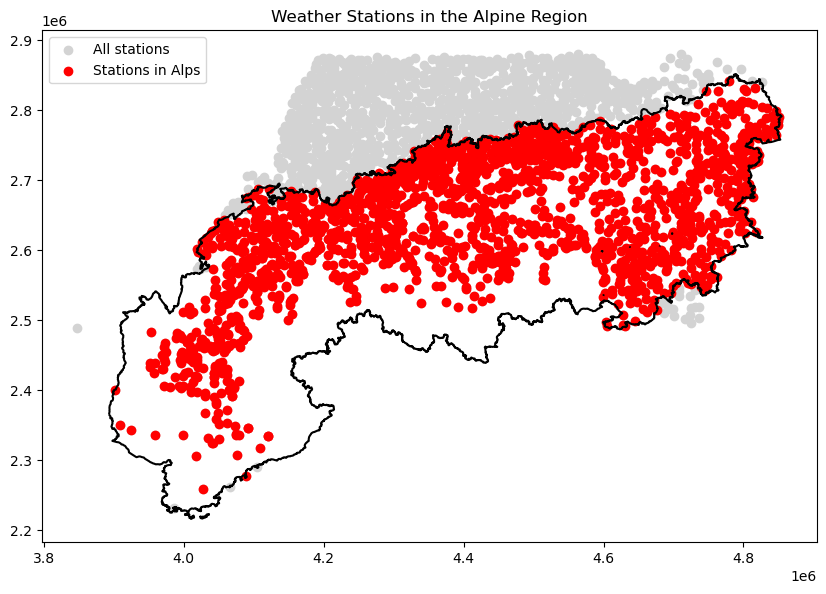

In [113]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf_alps.boundary.plot(ax=ax, edgecolor='black')
gdf_proj.plot(ax=ax, color='lightgray', label='All stations')
stations_in_alps.plot(ax=ax, color='red', label='Stations in Alps')
plt.legend()
plt.title("Weather Stations in the Alpine Region")
plt.show()


In [114]:
stations_in_alps

,station_id,name,latitude,longitude,elevation,country,provider,geometry
1,2978,Les_orres_fontaines,44.47567,6.55767,1895,France,FR_METEOFRANCE,POINT (4046677.268 2380186.742)
2,2977,Broc,46.60966,7.10816,682,Switzerland,CH_METEOSWISS,POINT (4099303.032 2615017.985)
3,2976,Mesocco,46.39560,9.23108,825,Switzerland,CH_METEOSWISS,POINT (4261799.553 2587236.844)
7,2972,Prapoutel_38002404,45.25000,5.97467,1840,France,FR_METEOFRANCE,POINT (4004665.394 2468305.539)
8,2971,Val_casterino,44.09183,7.50350,1554,France,FR_METEOFRANCE,POINT (4120669.706 2334651.739)
...,...,...,...,...,...,...,...,...
2783,12,Podgorje,46.70639,15.81972,230,Slovenia,SI_ARSO,POINT (4765952.237 2638897.47)
2784,10,Sv_duh_na_ostrem_vrhu,46.61325,15.46336,870,Slovenia,SI_ARSO,POINT (4739498.012 2626504.276)
2786,8,Kozji_vrh,46.59917,15.26750,340,Slovenia,SI_ARSO,POINT (4724631.143 2623859.326)
2791,3,Megeve,45.85317,6.60483,1080,France,FR_METEOFRANCE,POINT (4057059.628 2532728.861)


### Data Filtering

Filter snowpack_depth recordings by Weather Stations In European Alps

In [115]:
# Create list of European Alp Weather Stations
stations_in_alps_list = stations_in_alps['station_id']

# Filter station_data to Weather Stations in Alps
station_data = station_data[station_data['station_id'].isin(stations_in_alps_list)]



### Assess Data Validity

Determine which years within our dataset meet thresholds to consider analysis

- Standard Error (SE) / Confidence Intervals
- Minimum Sample Size
    - Size = 30
- Coefficient of Variation (CV)
    - Compares the variability to the mean.
    - High CV in low-sample years means those averages are unstable.

Span of continuous reliable years: 1936 - 2019


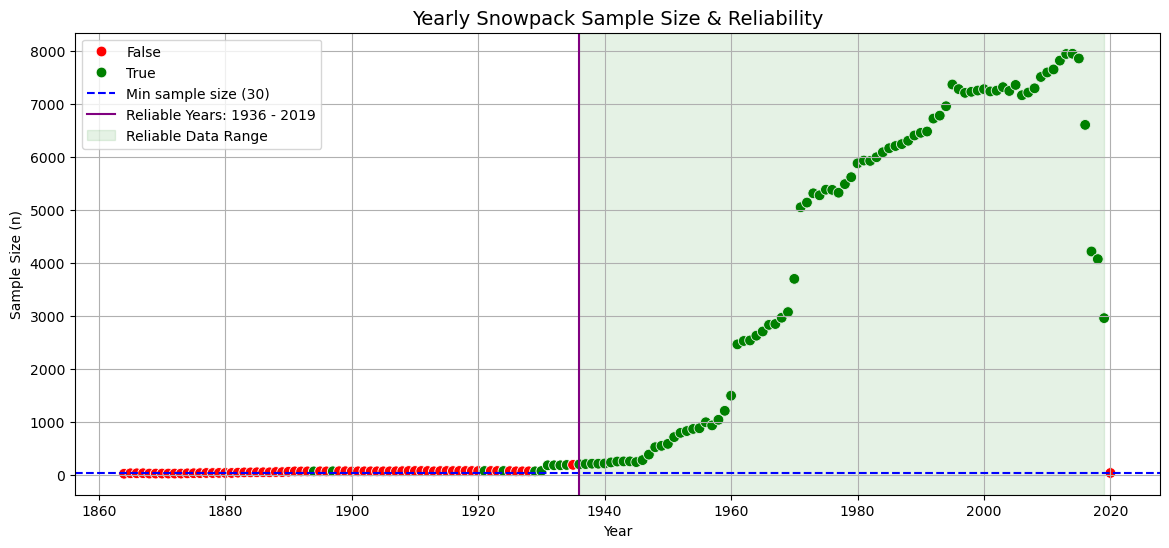

,year,n,mean,std,SE,CV,mean_change,Reliable
0,1864,15,23.733333,34.722300,8.965259,1.463018,NaN,False
1,1865,23,27.956522,36.283578,7.565649,1.297857,0.177943,False
2,1866,23,42.130435,47.987029,10.005987,1.139011,0.506998,False
3,1867,24,39.416667,55.106156,11.248497,1.398042,0.064413,False
4,1868,18,37.944444,47.327982,11.155312,1.247297,0.037350,False
...,...,...,...,...,...,...,...,...
152,2016,6598,41.549409,52.425408,0.645410,1.261761,0.413597,True
153,2017,4209,52.160846,54.493123,0.839948,1.044713,0.255393,True
154,2018,4065,46.993850,60.286408,0.945560,1.282857,0.099059,True
155,2019,2951,50.609963,55.952141,1.029988,1.105556,0.076949,True


In [116]:
# Assistance With AI

#  Aggregate Yearly Stats for Snowpack Depth
yearly_stats = station_data[station_data['winter']==True].groupby('year').agg(
    n=('hnsum', 'size'),
    mean=('hnsum', 'mean'),
    std=('hnsum', 'std')
).reset_index()

# Calculate Standard Error (SE) and Coefficient of Variation (CV)
yearly_stats['SE'] = yearly_stats['std'] / np.sqrt(yearly_stats['n']) # SE = Standard Deviation / (Square root of Sample size)
yearly_stats['CV'] = yearly_stats['std'] / yearly_stats['mean'] # CV = Standard Deviation / Average 

# Calculate year-to-year % change in mean snow depth
yearly_stats['mean_change'] = yearly_stats['mean'].pct_change().abs()

# Set Data Validity thresholds
min_sample_size = 30  # Minimum number of recordings per year
max_se_threshold = yearly_stats['SE'].median() * 1.5  # Allow 50% above median SE
mean_change_threshold = yearly_stats['mean'].mean() * 0.20  # 20% change allowed

# Assign Reliability flag
yearly_stats['Reliable'] = (
    (yearly_stats['n'] >= min_sample_size) &
    (yearly_stats['SE'] <= max_se_threshold) &
    (yearly_stats['mean_change'] <= mean_change_threshold)
)


# Assume yearly_stats['year'] is sorted
reliable_years = yearly_stats.loc[yearly_stats['Reliable'], 'year'].tolist()

# Identify an unbroken continous chain of 'Reliable Years' of data
earliest_reliable_year = None
latest_reliable_year = max(reliable_years) # Known Max() value is in continous chain
for i, start_year in enumerate(reliable_years):
    # Check if all years from start_year to max year are in the reliable list
    expected_years = list(range(start_year, max(reliable_years) + 1))
    if expected_years == reliable_years[i:]:
        earliest_reliable_year = start_year
        break

print(f"Span of continuous reliable years: {earliest_reliable_year} - {latest_reliable_year}")


# Plot
plt.figure(figsize=(14, 6))
sns.scatterplot(data=yearly_stats, x='year', y='n', hue='Reliable',
                palette={True: 'green', False: 'red'}, s=60)
plt.axhline(min_sample_size, color='blue', linestyle='--', label=f'Min sample size ({min_sample_size})')
plt.axvline(earliest_reliable_year, color='purple', linestyle='-', 
            label=f'Reliable Years: {earliest_reliable_year} - {latest_reliable_year}')

# Shaded region for reliable years
plt.axvspan(earliest_reliable_year,latest_reliable_year, color='green', alpha=0.1,
            label="Reliable Data Range")

plt.title("Yearly Snowpack Sample Size & Reliability", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sample Size (n)")
plt.legend()
plt.grid(True)
plt.show()

# --- Output the yearly stats for review ---
yearly_stats


### Data Filtering

#### Focus Range
Use identifed Focus_Range to isolate chosen sample data 

In [117]:
# Segregate the identiied Focus_Range
focus_range = np.arange(earliest_reliable_year,latest_reliable_year +1)
snow_recordings = station_data[(station_data['year'].isin(focus_range)) & (station_data['winter'] == True)]

# Sort by choronlogical order
snow_recordings = snow_recordings.sort_values(by=['year', 'month','station_id']).reset_index(drop=True)

pd.DataFrame(snow_recordings)
snow_recordings


,id,station_id,year,month,hnsum,winter
0,1784526,132,1936,1,37.0,True
1,1618609,153,1936,1,78.0,True
2,1733944,161,1936,1,19.0,True
3,1768395,313,1936,1,54.0,True
4,1775108,323,1936,1,63.0,True
...,...,...,...,...,...,...
358404,1442570,2911,2019,12,87.0,True
358405,1685437,2916,2019,12,72.0,True
358406,1823751,2929,2019,12,132.0,True
358407,1788563,2967,2019,12,61.0,True


#### Filter By Country

In [ ]:
snow_recordings = pd.merge(snow_recordings, stations_in_alps, on='station_id')
snow_recordings

,id,station_id,year,month,hnsum,winter,name,latitude,longitude,elevation,country,provider,geometry
0,1784526,132,1936,1,37.0,True,Scuol_CH_METEOSWISS,46.79327,10.28324,1303,Switzerland,CH_METEOSWISS,POINT (4342645.19 2631133.413)
1,1618609,153,1936,1,78.0,True,Arosa_CH_METEOSWISS,46.79262,9.67900,1878,Switzerland,CH_METEOSWISS,POINT (4296468.91 2631072.969)
2,1733944,161,1936,1,19.0,True,Lugano,46.00423,8.96030,273,Switzerland,CH_METEOSWISS,POINT (4240369.378 2544041.935)
3,1768395,313,1936,1,54.0,True,Rigi_Kulm,47.05606,8.48503,1793,Switzerland,CH_METEOSWISS,POINT (4205810.806 2661457.227)
4,1775108,323,1936,1,63.0,True,Samedan_CH_METEOSWISS,46.52625,9.87945,1708,Switzerland,CH_METEOSWISS,POINT (4311741.13 2601445.781)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358404,1442570,2911,2019,12,87.0,True,Groste_,46.21773,10.88976,2265,Italy,IT_TN,POINT (4389730.961 2567592.475)
358405,1685437,2916,2019,12,72.0,True,Grachen,46.19532,7.83682,1605,Switzerland,CH_METEOSWISS,POINT (4153854.459 2567124.193)
358406,1823751,2929,2019,12,132.0,True,Zermatt_CH_METEOSWISS,46.02927,7.75244,1638,Switzerland,CH_METEOSWISS,POINT (4146801.979 2548889.336)
358407,1788563,2967,2019,12,61.0,True,Segl_Maria,46.43233,9.76231,1804,Switzerland,CH_METEOSWISS,POINT (4302712.064 2591038.323)


In [119]:
snow_recordings.value_counts('country')

country
Austria        123549
Switzerland     75001
Germany         55812
France          49998
Slovenia        37256
Italy           16793
Name: count, dtype: int64

In [ ]:
# snow_recordings_austria = snow_recordings[snow_recordings['country']=='Austria']
# snow_recordings_switzerland = snow_recordings[snow_recordings['country']=='Switzerland']
# snow_recordings_germany = snow_recordings[snow_recordings['country']=='Germany']
# snow_recordings_france = snow_recordings[snow_recordings['country']=='France']
# snow_recordings_slovenia = snow_recordings[snow_recordings['country']=='Slovenia']
# snow_recordings_Italy = snow_recordings[snow_recordings['country']=='Italy']


### Filter by Elevation

#### Create Elevation Bands

In [126]:
snow_recordings['elevation'].describe()

count    358409.000000
mean        916.651209
std         501.648308
min           2.000000
25%         525.000000
50%         830.000000
75%        1250.000000
max        2964.000000
Name: elevation, dtype: float64

In [129]:
quartiles = np.quantile(snow_recordings['elevation'], [0.25, 0.5, 0.75])
Q1, median, Q3 = quartiles

def classify_elevation(elev):
    if elev <= Q1:
        return 'Low Elevation'
    elif Q1 < elev < Q3:
        return 'Mid Elevation'
    else:
        return 'High Elevation'
    
snow_recordings['elevation_band'] = snow_recordings['elevation'].apply(classify_elevation)

In [130]:
snow_recordings

,id,station_id,year,month,hnsum,winter,name,latitude,longitude,elevation,country,provider,geometry,elevation_band
0,1784526,132,1936,1,37.0,True,Scuol_CH_METEOSWISS,46.79327,10.28324,1303,Switzerland,CH_METEOSWISS,POINT (4342645.19 2631133.413),High Elevation
1,1618609,153,1936,1,78.0,True,Arosa_CH_METEOSWISS,46.79262,9.67900,1878,Switzerland,CH_METEOSWISS,POINT (4296468.91 2631072.969),High Elevation
2,1733944,161,1936,1,19.0,True,Lugano,46.00423,8.96030,273,Switzerland,CH_METEOSWISS,POINT (4240369.378 2544041.935),Low Elevation
3,1768395,313,1936,1,54.0,True,Rigi_Kulm,47.05606,8.48503,1793,Switzerland,CH_METEOSWISS,POINT (4205810.806 2661457.227),High Elevation
4,1775108,323,1936,1,63.0,True,Samedan_CH_METEOSWISS,46.52625,9.87945,1708,Switzerland,CH_METEOSWISS,POINT (4311741.13 2601445.781),High Elevation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358404,1442570,2911,2019,12,87.0,True,Groste_,46.21773,10.88976,2265,Italy,IT_TN,POINT (4389730.961 2567592.475),High Elevation
358405,1685437,2916,2019,12,72.0,True,Grachen,46.19532,7.83682,1605,Switzerland,CH_METEOSWISS,POINT (4153854.459 2567124.193),High Elevation
358406,1823751,2929,2019,12,132.0,True,Zermatt_CH_METEOSWISS,46.02927,7.75244,1638,Switzerland,CH_METEOSWISS,POINT (4146801.979 2548889.336),High Elevation
358407,1788563,2967,2019,12,61.0,True,Segl_Maria,46.43233,9.76231,1804,Switzerland,CH_METEOSWISS,POINT (4302712.064 2591038.323),High Elevation


## Visualisations

In [132]:
import pandas as pd
import numpy as np
import pymannkendall as mk

def mann_kendall_by_group(
    df: pd.DataFrame,
    group_cols,                     # e.g., ['elevation_band','month'] or ['country']
    time_col: str = 'year',
    value_col: str = 'hnsum',
    agg: str = 'mean',
    min_length: int = 10,
    variant: str = 'original',      # 'original' | 'seasonal' | 'hamed_rao' | 'yue_wang'
    period: int = 12,
    slope_per: str = 'decade'       # 'year' or 'decade'
) -> pd.DataFrame:

    if isinstance(group_cols, str):
        group_cols = [group_cols]

    df2 = df.copy()
    grouped = (
        df2.groupby(group_cols + [time_col], dropna=False)[value_col]
           .agg(agg).reset_index()
    )

    rows = []
    for keys, g in grouped.groupby(group_cols, dropna=False):
        g = g.sort_values(time_col)
        x = g[value_col].to_numpy(dtype=float)

        # drop NaNs but keep order
        x = x[~np.isnan(x)]
        if len(x) < min_length:
            d = {col: val for col, val in zip(group_cols, keys if isinstance(keys, tuple) else (keys,))}
            d.update(dict(n=len(x), trend='insufficient', p=np.nan, tau=np.nan,
                          slope_per_year=np.nan, z=np.nan))
            d[f'slope_per_{slope_per}'] = np.nan
            rows.append(d)
            continue

        if variant == 'original':
            res = mk.original_test(x)
        elif variant == 'seasonal':
            res = mk.seasonal_test(x, period=period)
        elif variant == 'hamed_rao':
            res = mk.hamed_rao_modification_test(x)
        elif variant == 'yue_wang':
            res = mk.yue_wang_modification_test(x)
        else:
            raise ValueError("variant must be one of: 'original','seasonal','hamed_rao','yue_wang'")

        slope_per_year = res.slope
        slope_scaled = slope_per_year if slope_per == 'year' else slope_per_year * 10.0

        d = {col: val for col, val in zip(group_cols, keys if isinstance(keys, tuple) else (keys,))}
        d.update(dict(
            n=len(x),
            trend=res.trend,      # 'increasing' | 'decreasing' | 'no trend'
            p=res.p,
            tau=res.Tau,
            slope_per_year=slope_per_year,
            z=getattr(res, 'z', np.nan)
        ))
        d[f'slope_per_{slope_per}'] = slope_scaled
        rows.append(d)

    out = pd.DataFrame(rows).sort_values(group_cols).reset_index(drop=True)
    return out


In [137]:
mk_month = mann_kendall_by_group(
    snow_recordings,
    group_cols=['month'],
    time_col='year',
    value_col='hnsum',
    agg='mean',
    min_length=15,
    variant='original',
    slope_per='decade'
)
mk_month

,month,n,trend,p,tau,slope_per_year,z,slope_per_decade
0,1,84,no trend,0.095915,-0.123924,-0.219989,-1.664991,-2.199892
1,2,84,no trend,0.073678,-0.133104,-0.216468,-1.788609,-2.164683
2,3,84,no trend,0.423908,-0.059667,-0.093834,-0.799659,-0.938339
3,4,84,decreasing,0.009755,-0.192197,-0.175994,-2.584405,-1.759943
4,11,84,no trend,0.198301,-0.095812,-0.104533,-1.286408,-1.045331
5,12,84,no trend,0.077491,-0.131383,-0.250892,-1.765431,-2.508917


In [134]:
mk_elev_month = mann_kendall_by_group(
    snow_recordings,
    group_cols=['elevation_band','month'],
    time_col='year',
    value_col='hnsum',
    agg='mean',
    min_length=15,
    variant='original',
    slope_per='decade'
)
mk_elev_month

,elevation_band,month,n,trend,p,tau,slope_per_year,z,slope_per_decade
0,High Elevation,1,84,no trend,0.423908,-0.059667,-0.156647,-0.799659,-1.566475
1,High Elevation,2,84,no trend,0.099037,-0.122777,-0.289159,-1.649538,-2.891587
2,High Elevation,3,84,no trend,0.634673,-0.035571,-0.092234,-0.475160,-0.922344
3,High Elevation,4,84,no trend,0.068833,-0.135399,-0.238880,-1.819514,-2.388805
4,High Elevation,11,84,no trend,0.298725,-0.077453,-0.142102,-1.039170,-1.421018
5,High Elevation,12,84,no trend,0.355862,-0.068847,-0.212968,-0.923278,-2.129679
6,Low Elevation,1,84,decreasing,0.016968,-0.177567,-0.157471,-2.387406,-1.574710
7,Low Elevation,2,84,no trend,0.220726,-0.091222,-0.076237,-1.224599,-0.762367
8,Low Elevation,3,84,no trend,0.978426,-0.002295,-0.000323,-0.027043,-0.003235
9,Low Elevation,4,84,no trend,0.888985,0.010614,0.000000,0.139589,0.000000


In [135]:
mk_country = mann_kendall_by_group(
    snow_recordings,
    group_cols=['country'],
    time_col='year',
    value_col='hnsum',
    agg='mean',
    min_length=15,
    variant='hamed_rao',   # adjust for autocorrelation in annual series
    slope_per='decade'
)
mk_country

,country,n,trend,p,tau,slope_per_year,z,slope_per_decade
0,Austria,47,no trend,0.108950,-0.147086,-0.183605,-1.602931,-1.836051
1,France,61,no trend,0.732155,0.030601,0.066089,0.342260,0.660885
2,Germany,83,no trend,0.675640,0.034969,0.044912,0.418420,0.449116
3,Italy,48,no trend,0.092989,-0.168440,-0.326450,-1.679840,-3.264503
4,Slovenia,59,decreasing,0.006520,-0.243717,-0.199945,-2.720427,-1.999451
5,Switzerland,84,no trend,0.217828,-0.091796,-0.080532,-1.232325,-0.805319


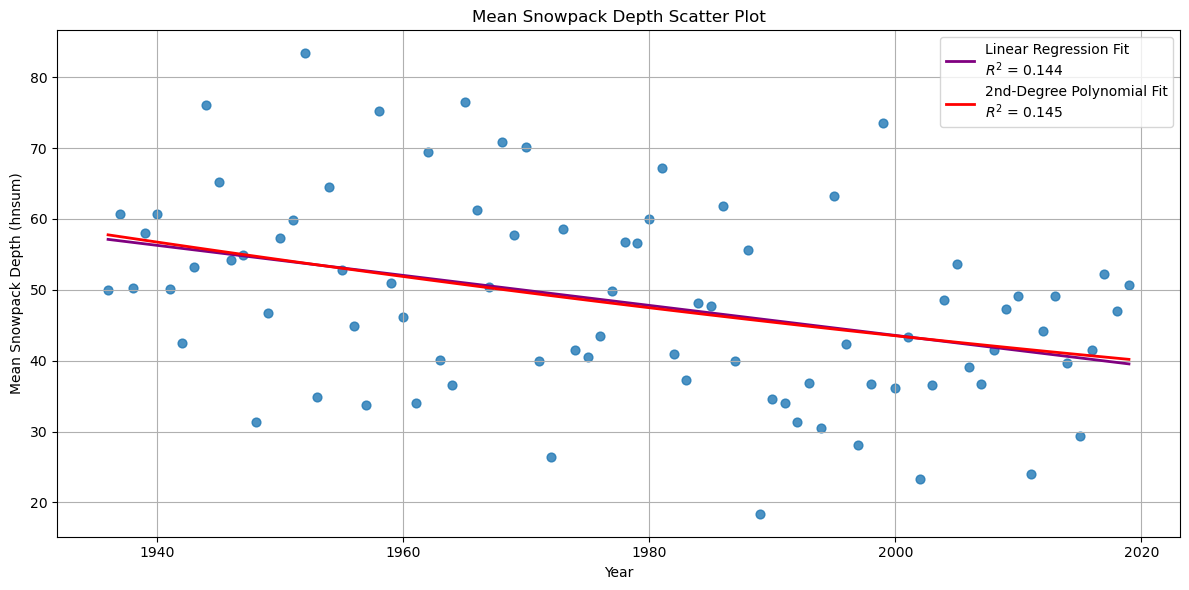

In [121]:
# Create Variables
mean_snow = snow_recordings.groupby('year')['hnsum'].mean().reset_index()
x = mean_snow['year'].values
y = mean_snow['hnsum'].values

# Produce Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(mean_snow['year'], mean_snow['hnsum'])

    # Predict y values
y_pred = slope * x + intercept



# Produce a 2nd-degree Polynomial Regression
from numpy.polynomial.polynomial import Polynomial
coefs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coefs)

    # Model Evaluation
from sklearn.metrics import r2_score
    # Formula r2 score
y_pred_poly = poly(x)
r2 = r2_score(y, y_pred_poly)



# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(x,mean_snow['hnsum'], alpha=0.8, s=40)
# Linear Regression Plot
plt.plot(x, y_pred, color='purple', linewidth=2, label=f'Linear Regression Fit\n$R^2$ = {r_value**2:.3f}')
# Polynomial Regresion Plot
plt.plot(x, y_pred_poly, color='red', linewidth=2, label=f'2nd-Degree Polynomial Fit\n$R^2$ = {r2:.3f}')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Snowpack Depth (hnsum)')
plt.title('Mean Snowpack Depth Scatter Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

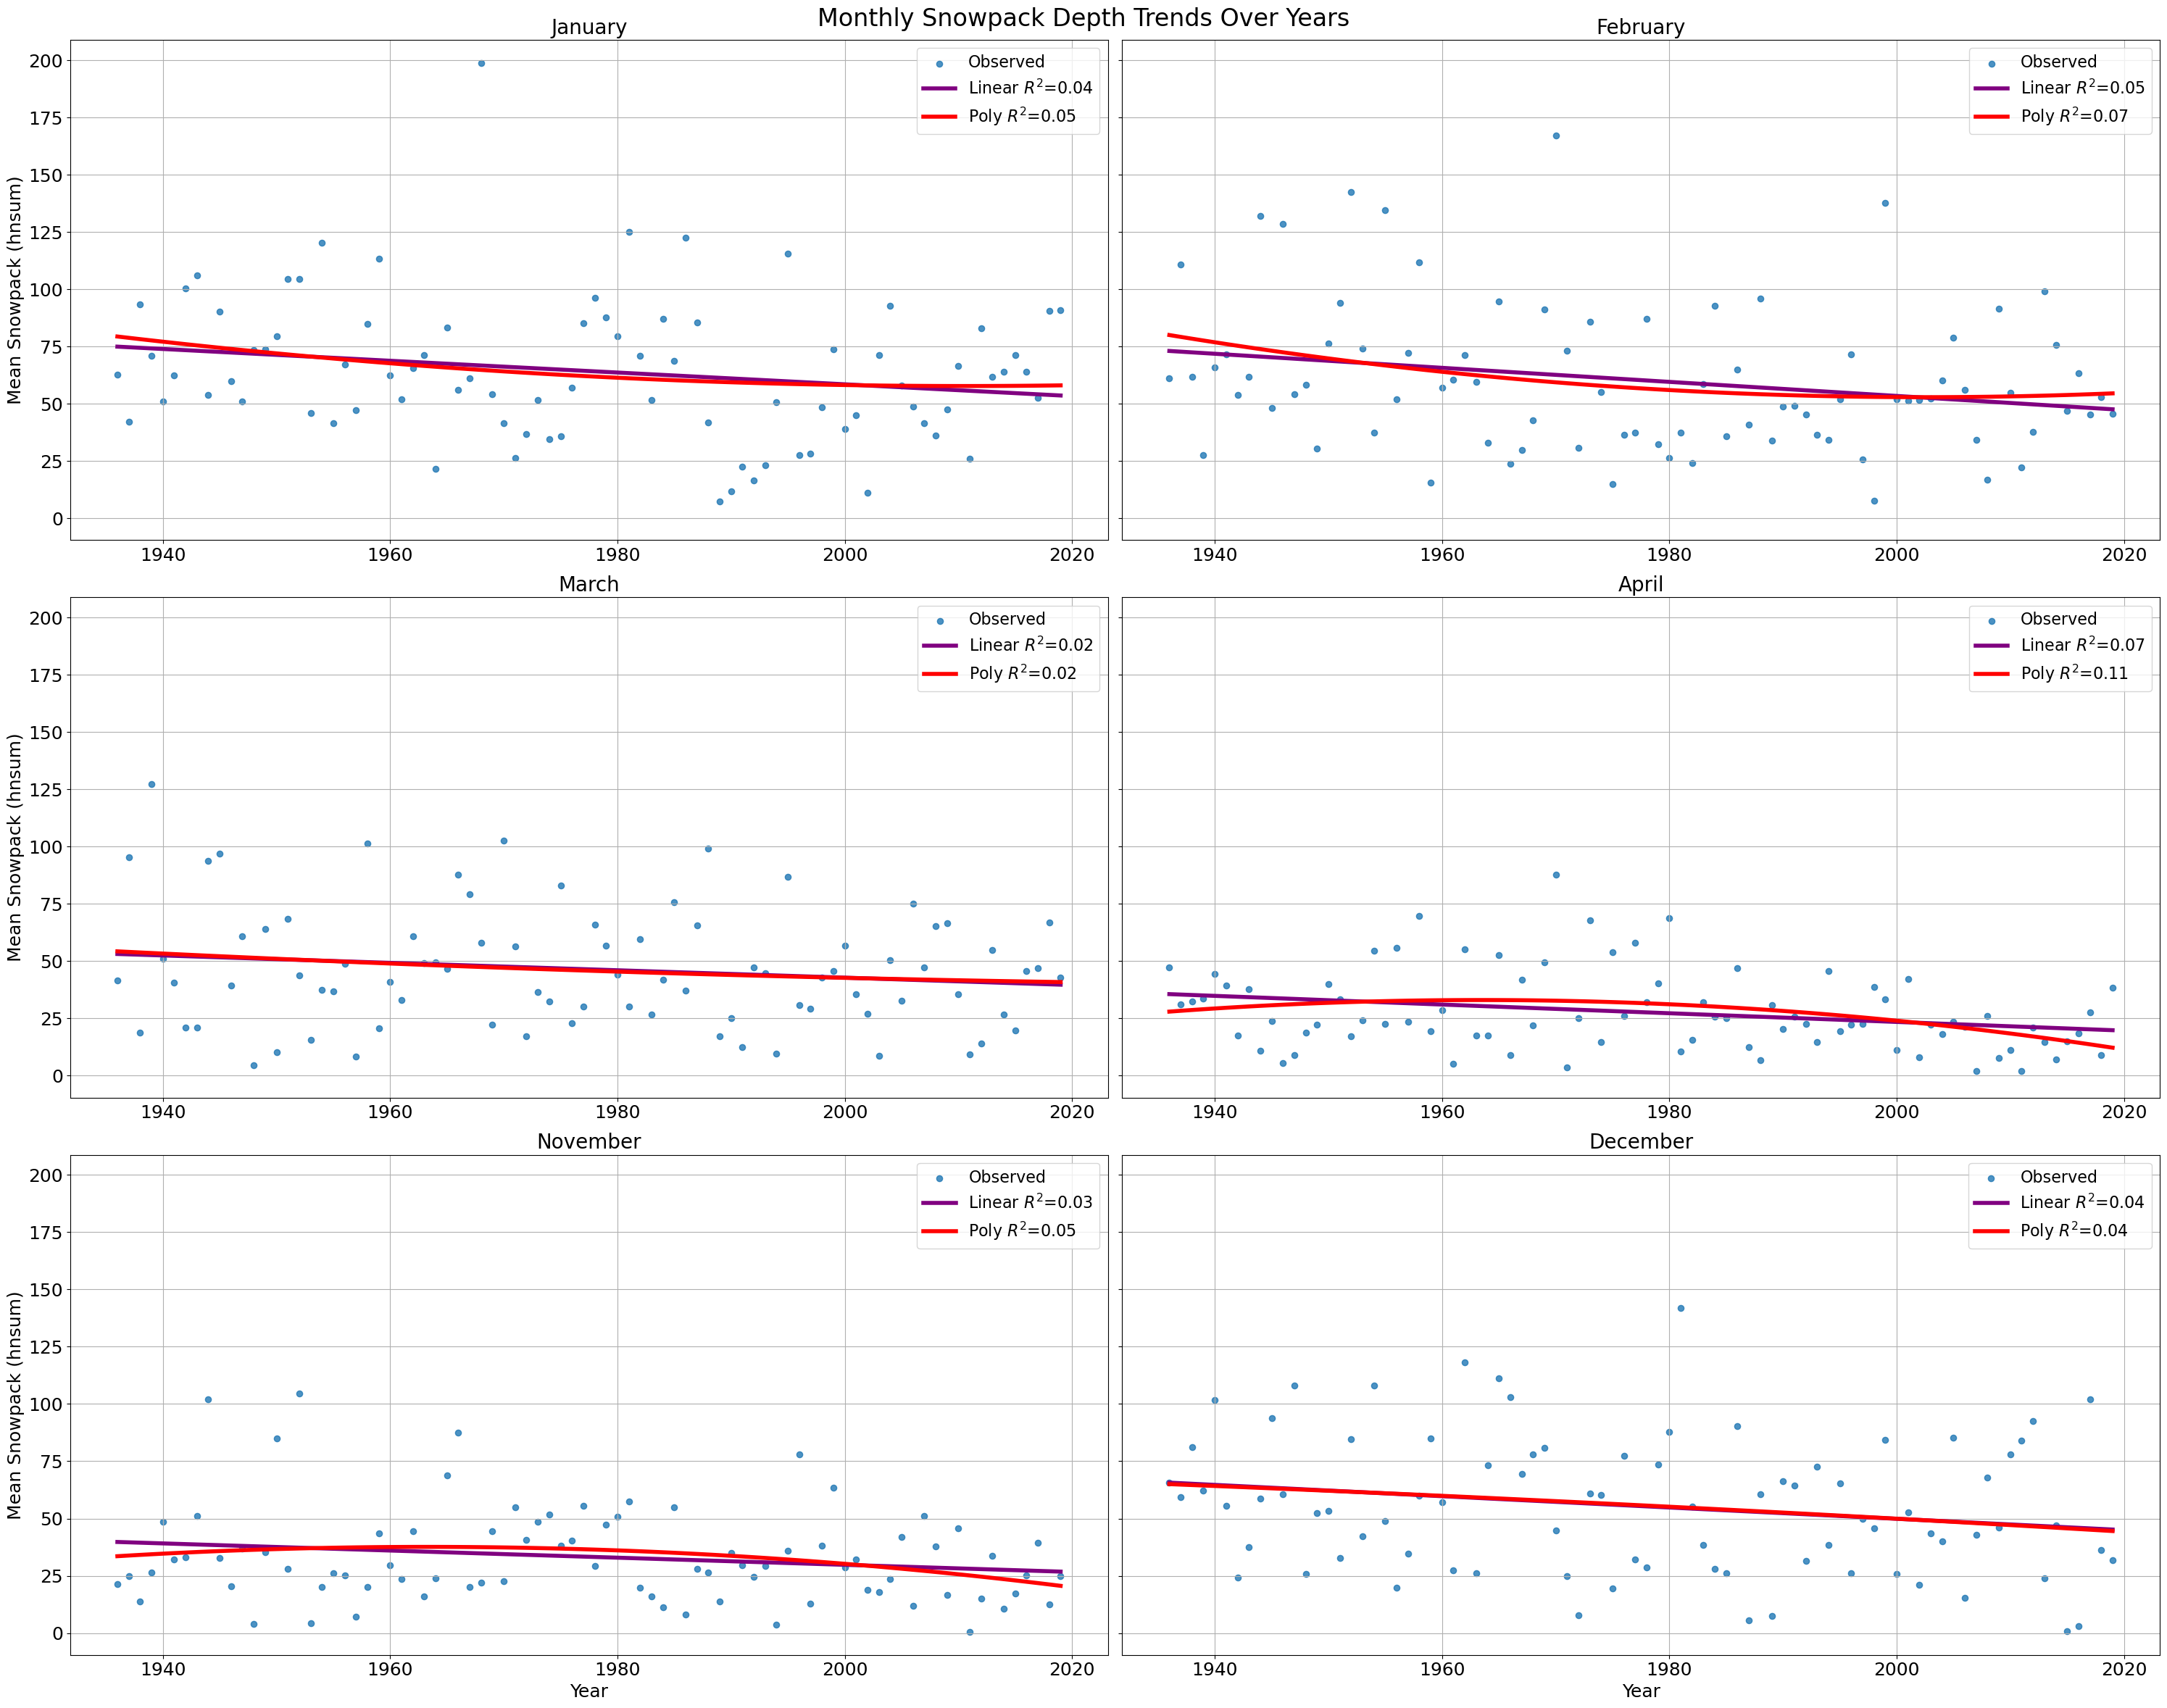

In [123]:
# Create Variables
monthly_avg = snow_recordings.groupby(['year', 'month'])['hnsum'].mean().reset_index()

x = mean_snow['year'].values
y = mean_snow['hnsum'].values

fig, axes = plt.subplots(3, 2, figsize=(30, 24), sharey=True)
fig.suptitle('Monthly Snowpack Depth Trends Over Years', fontsize=24)

# Month names for labeling
month_labels = ['January', 'February', 'March', 'April', 'November', 'December']

for i, month in enumerate([1,2,3,4,11,12]):
    ax = axes[i // 2, i % 2]
    month_data = monthly_avg[monthly_avg['month'] == month]

    x = month_data['year'].values
    y = month_data['hnsum'].values

    # Linear Regression
    slope, intercept, r_val, _, _ = linregress(x, y)
    y_pred = slope * x + intercept
    r2 = r_val ** 2

    # Polynomial Regression
    coefs = np.polyfit(x, y, deg=2)
    poly = np.poly1d(coefs)
    y_poly = poly(x)
    r2_poly = r2_score(y, y_poly)

    # Scatter and lines
    ax.scatter(x, y, s=35, alpha=0.8, label='Observed')
    ax.plot(x, y_pred, color='purple', linewidth=4,
            label=f'Linear $R^2$={r2:.2f}')
    ax.plot(x, y_poly, color='red', linewidth=4,
            label=f'Poly $R^2$={r2_poly:.2f}')

    ax.set_title(month_labels[i], fontsize=20)
    ax.grid(True)
    if i % 2 == 0:
        ax.set_ylabel('Mean Snowpack (hnsum)',fontsize=18)
    if i // 2 == 2:
        ax.set_xlabel('Year',fontsize=18)
    ax.legend(fontsize=16)
    ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()
